In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
import dataset = pd.read_csv('Social_Network_Ads.csv')
iniX =dataset.iloc[:,[2,3]].values
iniY=dataset.iloc[:,-1].values

SyntaxError: ignored

In [ ]:
 dataset = pd.read_csv('Social_Network_Ads.csv')
iniX =dataset.iloc[:,[2,3]].values
iniY=dataset.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
iniX_train,iniX_test,iniY_train,iniY_test=train_test_split(iniX,iniY,test_size=0.25,random_state=0)

In [5]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
iniX_train=sc.fit_transform(iniX_train)
iniX_test=sc.transform(iniX_test)


In [7]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(iniX_train,iniY_train)

GaussianNB()

In [8]:
iniY_predic=classifier.predict(iniX_test)

In [10]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(iniY_test,iniY_predic)
print(cm)

[[65  3]
 [ 7 25]]


<ipython-input-19-414b0ca24302>:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(iniX_set[iniY_set == j,0],iniX_set[iniY_set == j,1],


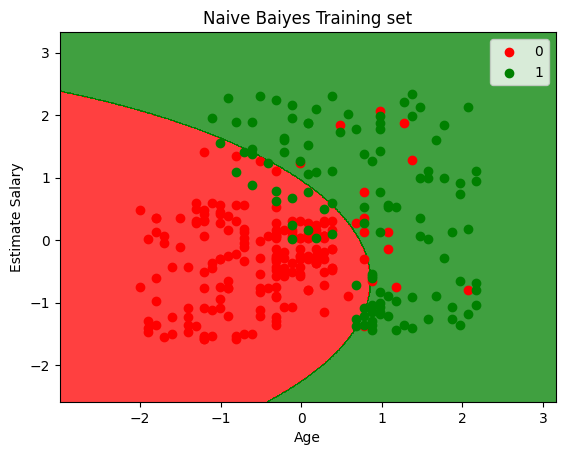

In [19]:
from matplotlib.colors import ListedColormap
iniX_set,iniY_set=iniX_train,iniY_train
X1,X2=np.meshgrid(np.arange(start=iniX_set[:,0].min()-1,stop=iniX_set[:,0].max()+1,step=0.01),np.arange(start=iniX_set[:,1].min()-1,stop=iniX_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(iniY_set)):
  plt.scatter(iniX_set[iniY_set == j,0],iniX_set[iniY_set == j,1],
            c=ListedColormap(('red','green'))(i),label=j)
plt.title('Naive Baiyes Training set')
plt.xlabel('Age')
plt.ylabel('Estimate Salary')
plt.legend()
plt.show()
